In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:

df = pd.read_csv('Iris.csv')


df = df.drop('Id', axis=1)


X = df.drop('Species', axis=1)
y = df['Species']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data successfully loaded and preprocessed.")

Data successfully loaded and preprocessed.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [4]:
k_range = range(1, 26)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(accuracy_score(y_test, y_pred))

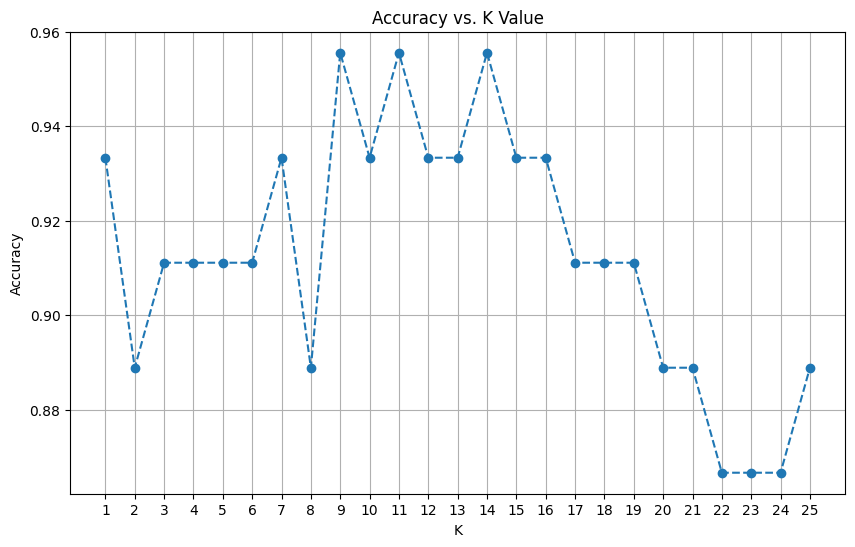

The optimal value of K is 9 with an accuracy of 0.9556


In [5]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()


best_k = k_range[k_scores.index(max(k_scores))]
print(f"The optimal value of K is {best_k} with an accuracy of {max(k_scores):.4f}")

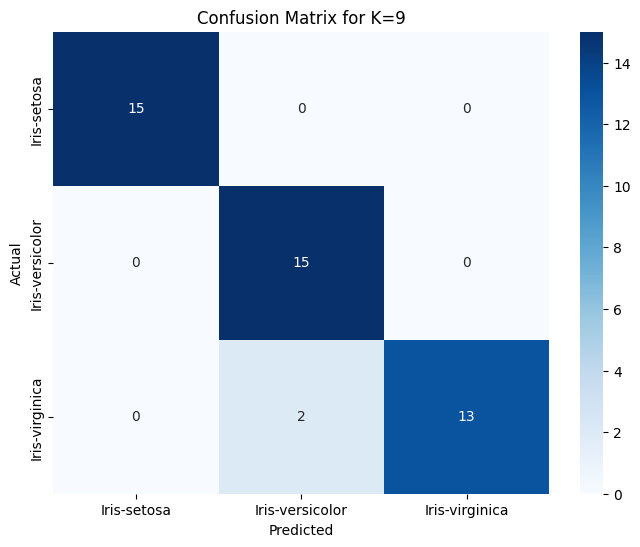

In [6]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred_final)
class_names = le.classes_ 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()

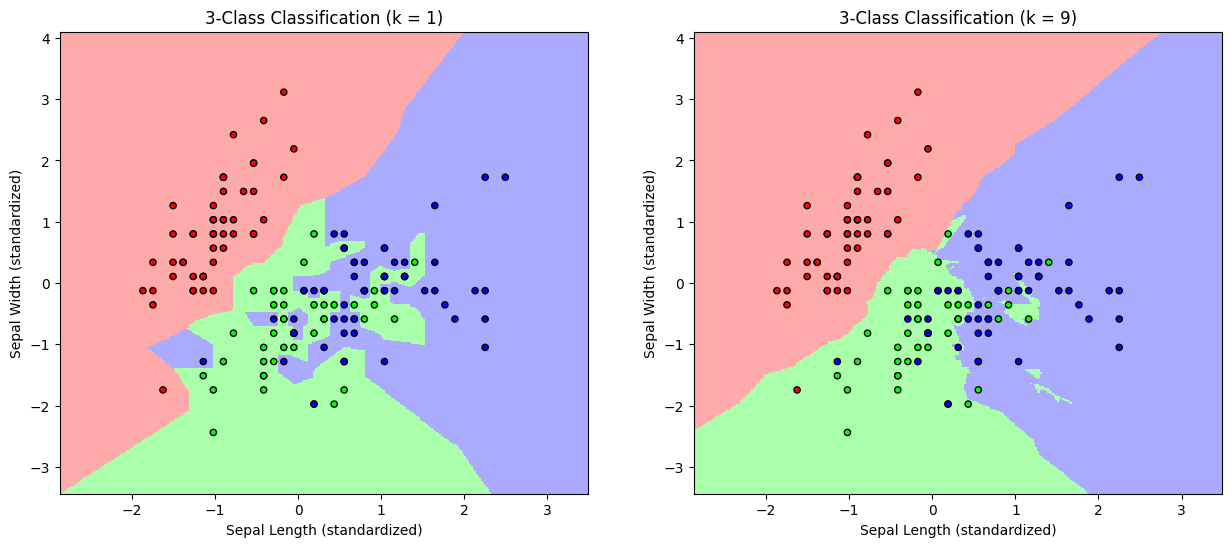

In [7]:

X_vis = X_scaled[:, :2] 
y_vis = y_encoded


h = .02  
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


plt.figure(figsize=(15, 6))

for i, k in enumerate([1, best_k]):
    knn_vis = KNeighborsClassifier(n_neighbors=k)
    knn_vis.fit(X_vis, y_vis)

   
    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    plt.subplot(1, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class Classification (k = {k})")
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')

plt.show()